In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [2]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest'
                              )

In [3]:
image_gen.flow_from_directory('dataset/penyakit/train')

Found 4191 images belonging to 3 classes.


In [4]:
image_gen.flow_from_directory('dataset/penyakit/test')

Found 985 images belonging to 3 classes.


In [5]:
image_shape = (255,255,3)

In [6]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [7]:
pwd

'e:\\#KULIAH\\Final Business\\CNN Model dan Codingan'

In [8]:
from datetime import datetime

In [9]:
datetime.now().strftime("%Y-%m-%d--%H.%M")

'2022-05-15--12.19'

In [10]:
log_dir = 'logs\\fit-penyakit11'

board = TensorBoard(log_dir = log_dir, histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255,255,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [13]:
train_image_gen = image_gen.flow_from_directory('dataset/penyakit/train',
                                               target_size=image_shape[:2],
                                               shuffle=True)

Found 4191 images belonging to 3 classes.


In [14]:
train_image_gen.class_indices

{'Sakit': 0, 'Sehat': 1, 'not-detected': 2}

In [15]:
test_image_gen = image_gen.flow_from_directory('dataset/penyakit/test',
                                               target_size=image_shape[:2],
                                               shuffle=True)

Found 985 images belonging to 3 classes.


In [16]:
test_image_gen.class_indices

{'Sakit': 0, 'Sehat': 1, 'not-detected': 2}

In [17]:
results = model.fit(train_image_gen,validation_data=test_image_gen,epochs=17,callbacks=[early_stop,board])

Epoch 1/17
  1/131 [..............................] - ETA: 0s - loss: 1.0874 - accuracy: 0.4688WARNING:tensorflow:From e:\Anaconda\envs\OCR\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
131/131 [==============================] - 420s 3s/step - loss: 0.7523 - accuracy: 0.5672 - val_loss: 0.6061 - val_accuracy: 0.6294
Epoch 2/17
131/131 [==============================] - 339s 3s/step - loss: 0.5999 - accuracy: 0.6538 - val_loss: 0.5821 - val_accuracy: 0.6569
Epoch 3/17
131/131 [==============================] - 342s 3s/step - loss: 0.4894 - accuracy: 0.7454 - val_loss: 0.3608 - val_accuracy: 0.8609
Epoch 4/17
131/131 [==============================] - 339s 3s/step - loss: 0.3980 - accuracy: 0.8182 - val_loss: 0.2998 - val_accuracy: 0.9025
Epoch 5/17
131/131 [==============================] - 340s 3s/step

In [18]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


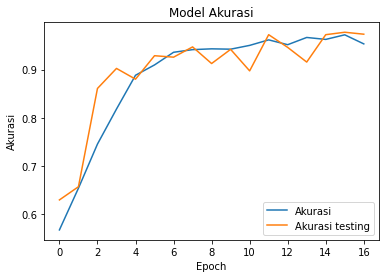

In [19]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Akurasi','Akurasi testing'], loc='lower right')
plt.savefig('ACC-Penyakit-11-Lite.png')
plt.show()


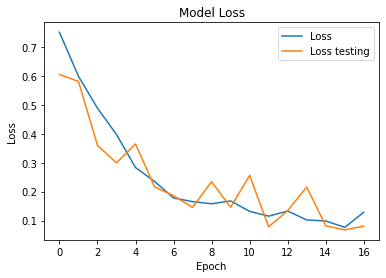

In [20]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Loss testing'], loc='upper right')
plt.savefig('LOSS-Penyakit-11-Lite.png')
plt.show()

In [21]:
train_image_gen.class_indices

{'Sakit': 0, 'Sehat': 1, 'not-detected': 2}

In [21]:
model.save('CNN-Penyakit-11-Lite.h5')

In [22]:
model.save('CNN-Penyakit-11-Lite')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN-Penyakit-11-Lite\assets


In [2]:
new_model = tf.keras.models.load_model('CNN-Penyakit-11-Lite')

In [39]:
import numpy as np
from keras.preprocessing import image

def preproses(gambar):
    foto = image.load_img(gambar, target_size=(255,255))
    foto = image.img_to_array(foto)
    foto = np.expand_dims(foto, axis=0)
    return foto/255

sakit1 = 'Test gambar\Pengujian-mode2\sakit1.jpg'
sakit2 = 'Test gambar\Pengujian-mode2\sakit2.jpg'
sakit3 = 'Test gambar\Pengujian-mode2\sakit3.jpg'
sakit4 = 'Test gambar\Pengujian-mode2\sakit4.jpg'
sakit5 = 'Test gambar\Pengujian-mode2\sakit5.jpg'
sakit6 = 'Test gambar\Pengujian-mode2\sakit6.jpg'
sakit7 = 'Test gambar\Pengujian-mode2\sakit7.jpg'
sakit8 = 'Test gambar\Pengujian-mode2\sakit8.jpg'
sakit9 = 'Test gambar\Pengujian-mode2\sakit9.jpg'
sakit10 = 'Test gambar\Pengujian-mode2\sakit10.jpg'
sakit11 = 'Test gambar\Pengujian-mode2\sakit11.jpg'
sakit12 = 'Test gambar\Pengujian-mode2\sakit12.jpg'
sakit13 = 'Test gambar\Pengujian-mode2\sakit13.jpg'

sakit1 = preproses(sakit1)
sakit2 = preproses(sakit2)
sakit3 = preproses(sakit3)
sakit4 = preproses(sakit4)
sakit5 = preproses(sakit5)
sakit6 = preproses(sakit6)
sakit7 = preproses(sakit7)
sakit8 = preproses(sakit8)
sakit9 = preproses(sakit9)
sakit10 = preproses(sakit10)
sakit11 = preproses(sakit11)
sakit12 = preproses(sakit12)
sakit13 = preproses(sakit13)

In [41]:
sehat1 = 'Test gambar\Pengujian-mode2\sehat1.jpg'
sehat2 = 'Test gambar\Pengujian-mode2\sehat2.jpg'
sehat3 = 'Test gambar\Pengujian-mode2\sehat3.jpg'
sehat4 = 'Test gambar\Pengujian-mode2\sehat4.jpg'
sehat5 = 'Test gambar\Pengujian-mode2\sehat5.jpg'
sehat6 = 'Test gambar\Pengujian-mode2\sehat6.jpg'
sehat7 = 'Test gambar\Pengujian-mode2\sehat7.jpg'
sehat8 = 'Test gambar\Pengujian-mode2\sehat8.jpg'
sehat9 = 'Test gambar\Pengujian-mode2\sehat9.jpg'
sehat10 = 'Test gambar\Pengujian-mode2\sehat10.jpg'
sehat11 = 'Test gambar\Pengujian-mode2\sehat11.jpg'
sehat12 = 'Test gambar\Pengujian-mode2\sehat12.jpg'
sehat13 = 'Test gambar\Pengujian-mode2\sehat13.jpg'


sehat1 = preproses(sehat1)
sehat2 = preproses(sehat2)
sehat3 = preproses(sehat3)
sehat4 = preproses(sehat4)
sehat5 = preproses(sehat5)
sehat6 = preproses(sehat6)
sehat7 = preproses(sehat7)
sehat8 = preproses(sehat8)
sehat9 = preproses(sehat9)
sehat10 = preproses(sehat10)
sehat11 = preproses(sehat11)
sehat12 = preproses(sehat12)
sehat13 = preproses(sehat13)


In [58]:
def prediksi(foto):
    a = new_model.predict_proba(foto).max()
    b=new_model.predict_classes(foto)
    if b == 0:
        return("Sakit, dengan probabilitas: ") + str(a)
    elif b == 1:
        return("Sehat, dengan probabilitas: ") + str(a)
    else:
        return("Bukan, Tanaman dengan probabilitas: ") + str(a)


print("Prediksi gambar Sakit 1 =",prediksi(sakit1))
print("Prediksi gambar Sakit 2 =",prediksi(sakit2))
print("Prediksi gambar Sakit 3 =",prediksi(sakit3))
print("Prediksi gambar Sakit 4 =",prediksi(sakit4))
print("Prediksi gambar Sakit 5 =",prediksi(sakit5))
print("Prediksi gambar Sakit 6 =",prediksi(sakit6))
print("Prediksi gambar Sakit 7 =",prediksi(sakit7))
print("Prediksi gambar Sakit 8 =",prediksi(sakit8))
print("Prediksi gambar Sakit 9 =",prediksi(sakit9))
print("Prediksi gambar Sakit 10 =",prediksi(sakit10))
print("Prediksi gambar Sakit 11 =",prediksi(sakit11))
print("Prediksi gambar Sakit 12 =",prediksi(sakit12))
print("Prediksi gambar Sakit 13 =",prediksi(sakit13))


Prediksi gambar Sakit 1 = Sakit, dengan probabilitas: 0.99715805
Prediksi gambar Sakit 2 = Sakit, dengan probabilitas: 0.9996705
Prediksi gambar Sakit 3 = Sakit, dengan probabilitas: 0.9971861
Prediksi gambar Sakit 4 = Sakit, dengan probabilitas: 0.9617526
Prediksi gambar Sakit 5 = Sakit, dengan probabilitas: 0.99715805
Prediksi gambar Sakit 6 = Sakit, dengan probabilitas: 0.966222
Prediksi gambar Sakit 7 = Sakit, dengan probabilitas: 0.9381715
Prediksi gambar Sakit 8 = Sakit, dengan probabilitas: 0.910682
Prediksi gambar Sakit 9 = Sakit, dengan probabilitas: 0.6108871
Prediksi gambar Sakit 10 = Sakit, dengan probabilitas: 0.97837216
Prediksi gambar Sakit 11 = Sakit, dengan probabilitas: 0.9907884
Prediksi gambar Sakit 12 = Sakit, dengan probabilitas: 0.9999548
Prediksi gambar Sakit 13 = Sakit, dengan probabilitas: 0.9904792


In [59]:
print("Prediksi gambar Sehat 1 =",prediksi(sehat1))
print("Prediksi gambar Sehat 2 =",prediksi(sehat2))
print("Prediksi gambar Sehat 3 =",prediksi(sehat3))
print("Prediksi gambar Sehat 4 =",prediksi(sehat4))
print("Prediksi gambar Sehat 5 =",prediksi(sehat5))
print("Prediksi gambar Sehat 6 =",prediksi(sehat6))
print("Prediksi gambar Sehat 7 =",prediksi(sehat7))
print("Prediksi gambar Sehat 8 =",prediksi(sehat8))
print("Prediksi gambar Sehat 9 =",prediksi(sehat9))
print("Prediksi gambar Sehat 10 =",prediksi(sehat10))
print("Prediksi gambar Sehat 11 =",prediksi(sehat11))
print("Prediksi gambar Sehat 12 =",prediksi(sehat12))
print("Prediksi gambar Sehat 13 =",prediksi(sehat13))

Prediksi gambar Sehat 1 = Sehat, dengan probabilitas: 0.99992037
Prediksi gambar Sehat 2 = Sehat, dengan probabilitas: 0.6758562
Prediksi gambar Sehat 3 = Sehat, dengan probabilitas: 0.9587682
Prediksi gambar Sehat 4 = Sehat, dengan probabilitas: 0.9618102
Prediksi gambar Sehat 5 = Sehat, dengan probabilitas: 0.9918785
Prediksi gambar Sehat 6 = Sakit, dengan probabilitas: 0.717658
Prediksi gambar Sehat 7 = Sehat, dengan probabilitas: 0.9919199
Prediksi gambar Sehat 8 = Sehat, dengan probabilitas: 0.8222715
Prediksi gambar Sehat 9 = Sehat, dengan probabilitas: 0.98737586
Prediksi gambar Sehat 10 = Sehat, dengan probabilitas: 0.94915485
Prediksi gambar Sehat 11 = Sehat, dengan probabilitas: 0.999964
Prediksi gambar Sehat 12 = Sehat, dengan probabilitas: 0.9907699
Prediksi gambar Sehat 13 = Sehat, dengan probabilitas: 0.999946


In [23]:
b=new_model.predict_classes(sakit1)
if b == 0:
    print("Sakit")
elif b == 1:
    print("Sehat")
else:
    print("Bukan Tanaman")

Sakit


In [42]:
b=model.predict_proba(foto)
print(b)

[[4.7852702e-02 9.5155984e-01 5.8750750e-04]]


tensorboard --logdir logs\fit

In [47]:
print(b.max)

TypeError: 'numpy.ndarray' object is not callable